<a href="https://colab.research.google.com/github/nathsmo/Victimas_PNC_2017/blob/master/Procesamiento2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Procesamiento de datos

* Segundo análisis creado a partir de una investigación personal después de la clase y entrega original del proyecto.

## Importar librerias

In [2]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.externals.six import StringIO  
from sklearn import metrics
import pandas as pd
import numpy as np  
import pydotplus
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from pandas import DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import sklearn
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Importando CSV

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vic_final.csv to vic_final.csv


In [0]:
df = pd.read_csv('vic_final.csv')
df.drop(u'Unnamed: 0', axis=1, inplace=True)# irrelevante

## División de regiones de la data


* Reference for dividing the regions: https://aprende.guatemala.com/historia/geografia/regiones-de-guatemala/

### Departamentos segun código

| Codigo  | Departamento      |
|----|----------------|
| 1  | Guatemala      |
| 2  | El Progreso    |
| 3  | Sacatepéquez   |
| 4  | Chimaltenango  |
| 5  | Escuintla      |
| 6  | Santa Rosa     |
| 7  | Sololá         |
| 8  | Totonicapán    |
| 9  | Quetzaltenango |
| 10 | Suchitepéquez  |
| 11 | Retalhuleu     |
| 12 | San Marcos     |
| 13 | Huehuetenango  |
| 14 | Quiché         |
| 15 | Baja Verapaz   |
| 16 | Alta Verapaz   |
| 17 | Petén          |
| 18 | Izabal         |
| 19 | Zacapa         |
| 20 | Chiquimula     |
| 21 | Jalapa         |
| 22 | Jutiapa        |


In [0]:
metro = [1]
norte = [15, 16]
nor_or = [18, 19, 2, 20]
sur_or = [21, 22, 6]
central = [4, 3, 5]
sur_oc = [12, 11, 9, 8, 7, 10]
nor_oc = [13, 14]
peten = [17]

reg = []

In [0]:
for i in df['dept']:
    if i in metro:
        reg.append("metro")
    elif i in norte:
        reg.append("norte")
    elif i in nor_or:
        reg.append("nor_or")    
    elif i in sur_or:
        reg.append("sur_or")    
    elif i in central:
        reg.append("central") 
    elif i in sur_oc:
        reg.append("sur_oc")    
    elif i in nor_oc:
        reg.append("nor_oc")
    elif i in peten:
        reg.append("peten")

In [0]:
df['region'] = reg

In [8]:
df.head()

,mes,dia,dia_sem,hora,g_hora,area,dept,muni,sexo,edad,g_edad,mayor_menor,delito,g_delitos,region
0,1,1,7,3,1,2,1,115,1,22,5,1,69,4,metro
1,1,1,7,19,4,2,2,207,1,24,5,1,69,4,nor_or
2,1,2,1,8,2,2,19,1901,1,35,8,1,75,3,nor_or
3,1,2,1,18,4,1,5,501,1,27,6,1,75,3,central
4,1,2,1,12,3,2,10,1001,1,62,13,1,75,3,sur_oc


In [0]:
Region_Count_Table = df.region.value_counts()

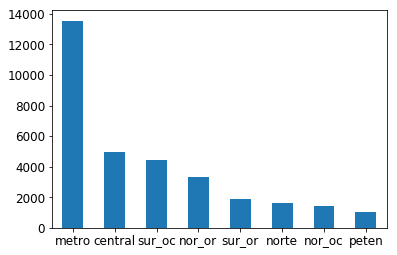

In [10]:
Region_Count_Table.plot.bar(x='lab', y='val', rot=0)

* There are probably more crimes reported in the City because there's more police presence there. Also it is easier to go and report a crime than in the outside. 
* It is interesting how the North Occidental and North region have almost the same crime.


In [0]:
ciudad = df.loc[df.dept ==1]

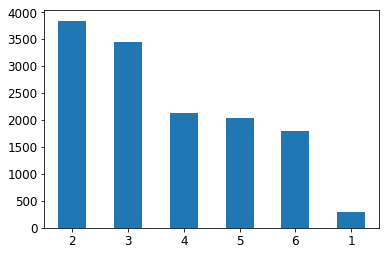

In [18]:
Ciudad_Count_Table = ciudad.g_delitos.value_counts()
Ciudad_Count_Table.plot.bar(x='lab', y='val', rot=0)

* The crime group are in order of less serious to fatal and worst.

[0] Detenciones

[1] Crímenes leves

[2] Lesiones 

[3] Hurto leve 

[4] Robo 

[5] Extorsión 

[6] Muerte  
